In [1]:
%matplotlib inline


# GMM covariances


Demonstration of several covariances types for Gaussian mixture models.

See https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture for more information on the estimator.

Although GMM are often used for clustering, we can compare the obtained
clusters with the actual classes from the dataset. We initialize the means
of the Gaussians with the means of the classes from the training set to make
this comparison valid.

We plot predicted labels on both training and held out test data using a
variety of GMM covariance types on the iris dataset.
We compare GMMs with spherical, diagonal, full, and tied covariance
matrices in increasing order of performance. Although one would
expect full covariance to perform best in general, it is prone to
overfitting on small datasets and does not generalize well to held out
test data.

On the plots, train data is shown as dots, while test data is shown as
crosses. The iris dataset is four-dimensional. Only the first two
dimensions are shown here, and thus some points are separated in other
dimensions.



This is a simplified version of the code that can be found here:
https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html#sphx-glr-auto-examples-mixture-plot-gmm-covariances-py

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold


# Iris data - EM clustering
Note that while labels are available for this data set, they will not be used in GMM identification.  

In [3]:
iris = datasets.load_iris()

X_train = iris.data
y_train = iris.target

n_classes = len(np.unique(y_train))  #list the unique elements in y_train : nb of different labels

## GMM model estimation

In [12]:
# Try GMMs using full covariance (no constraints imposed on cov)
estimator = GaussianMixture(n_components=n_classes, 
                             covariance_type='full', max_iter=50, random_state=0)

# !! 
Lines below initialize with centers of mass of each clsuetr, as labels are known...
Usually, 3 different centers are required, chosen at random. It this latter case, the correct
    clusters are extracted, upto some circular permutation on the labels

In [13]:
# Since we have class labels for the training data, we can
# initialize the GMM parameters in a supervised manner.
estimator.means_init = np.array([X_train[y_train == i].mean(axis=0)
                                    for i in range(n_classes)])

estimator.fit(X_train)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=50,
        means_init=array([[5.006, 3.428, 1.462, 0.246],
       [5.936, 2.77 , 4.26 , 1.326],
       [6.588, 2.974, 5.552, 2.026]]),
        n_components=3, n_init=1, precisions_init=None, random_state=0,
        reg_covar=1e-06, tol=0.001, verbose=0, verbose_interval=10,
        warm_start=False, weights_init=None)

In [14]:
print(estimator.covariances_)
#print(estimator.covariances_[1][1:3,1:3])

[[[0.121765   0.097232   0.016028   0.010124  ]
  [0.097232   0.140817   0.011464   0.009112  ]
  [0.016028   0.011464   0.029557   0.005948  ]
  [0.010124   0.009112   0.005948   0.010885  ]]

 [[0.27559955 0.09650723 0.18582846 0.0549543 ]
  [0.09650723 0.09250653 0.09101528 0.04301206]
  [0.18582846 0.09101528 0.20317456 0.06205416]
  [0.0549543  0.04301206 0.06205416 0.03249313]]

 [[0.38761456 0.09227913 0.30236447 0.06061135]
  [0.09227913 0.11046418 0.08376163 0.05568011]
  [0.30236447 0.08376163 0.32534816 0.07219341]
  [0.06061135 0.05568011 0.07219341 0.08453171]]]


In [15]:
print(estimator.means_)
type(estimator.means_)
estimator.means_[0,0::2]

[[5.006      3.428      1.462      0.246     ]
 [5.91790445 2.77820033 4.20703204 1.29913322]
 [6.54708722 2.94971413 5.48510319 1.98823857]]


array([5.006, 1.462])

## Ploting results : 
choose the  axis pair to visualize 

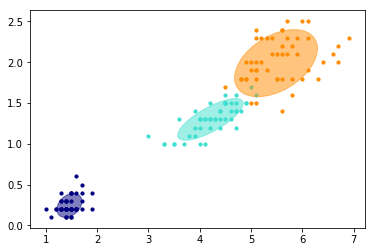

In [17]:
# for K clusters, specify K colors  (here K=3)
colors = ['navy', 'turquoise', 'darkorange']

fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})

axes=['x3','x4']
for n, color in enumerate(colors):
        # defines ellipses parameters, using eigen-axes
        data = iris.data[iris.target == n]
        if axes==['x1','x2']:
            covariances = estimator.covariances_[n][0:2, 0:2]
            plt.scatter(data[:, 0], data[:, 1], s=10, color=color,
                    label=iris.target_names[n])
            Est_means=estimator.means_[n,0:2]
        elif axes == ['x1','x3']:
            covariances = estimator.covariances_[n][0::2, 0::2]
            plt.scatter(data[:, 0], data[:, 2], s=10, color=color,
                    label=iris.target_names[n])
            Est_means=estimator.means_[n,0::2]
        elif axes ==['x1','x4']:
            covariances = estimator.covariances_[n][0::3, 0::3]
            plt.scatter(data[:, 0], data[:, 3], s=10, color=color,
                    label=iris.target_names[n])
            Est_means=estimator.means_[n,0::3]
        elif axes==['x2','x3']:
            covariances = estimator.covariances_[n][1:3, 1:3]
            plt.scatter(data[:, 1], data[:, 2], s=10, color=color,
                    label=iris.target_names[n])
            Est_means=estimator.means_[n,1:3]
        elif axes==['x2','x4']:
            covariances = estimator.covariances_[n][1::2, 1::2]
            plt.scatter(data[:, 1], data[:, 3], s=10, color=color,
                    label=iris.target_names[n])
            Est_means=estimator.means_[n,1::2]
        elif axes==['x3','x4']:
            covariances = estimator.covariances_[n][2:, 2:]
            plt.scatter(data[:, 2], data[:, 3], s=10, color=color,
                    label=iris.target_names[n])
            Est_means=estimator.means_[n,2:]
        
        v, w = np.linalg.eigh(covariances) 
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        ell = mpl.patches.Ellipse(Est_means, v[0], v[1],
                                  180 + angle, color=color)
        #dplot the ellipses
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect('auto')
     
        
# for visualizing axe1 vs axe2, use "covariances = estimator.covariances_[n][0:2, 0:2]"
# for visualizing axe1 vs axe3, use "covariances = estimator.covariances_[n][0::2, 0::2]"
# for visualizing axe1 vs axe4, use "covariances = estimator.covariances_[n][0::3, 0::3]"
# for visualizing axe2 vs axe3, use "covariances = estimator.covariances_[n][1:3, 1:3]"
# for visualizing axe2 vs axe4, use "covariances = estimator.covariances_[n][1::2, 1::2]"
# for visualizing axe3 vs axe4, use "covariances = estimator.covariances_[n][2:, 2:]"



bic = [574.01783272 580.86127847 633.77840653 652.32822794 696.51450225]
aic = [486.70940919 448.39332553 456.15092417 429.54121617 428.56796108]


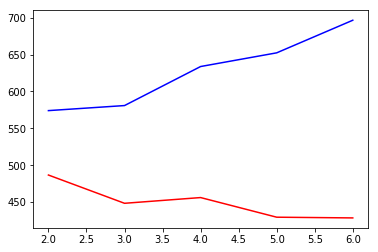

In [26]:
import itertools
from scipy import linalg
from sklearn import mixture

lowest_bic = np.infty
bic = []
aic = []
n_components_range = range(2, 7)
cv_type =  'full'

    
for n_comp in n_components_range:
        # Fit a Gaussian mixture with EM
    gmm = GaussianMixture(n_components=n_comp,
                                  covariance_type=cv_type, max_iter=1000, random_state=1)
    gmm.fit(X_train)
    #bic.append(gmm.aic(X_train))
    bic.append(gmm.bic(X_train))
    aic.append(gmm.aic(X_train))
bic = np.array(bic)
aic = np.array(aic)

# Plot the BIC scores

plt.plot(np.linspace(2,6,5),bic,'b',np.linspace(2,6,5),aic,'r')

print("bic = {}".format(bic))
print("aic = {}".format(aic))    


In [27]:
import random
y=np.arange(16)
y=np.reshape(y,(4,4))
print(y)
y[2:,2:]

for i in range(1,6):
    print(i)
x=np.linspace(1,7,7)
np.linspace(2,6,5)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
1
2
3
4
5


array([2., 3., 4., 5., 6.])